In [1]:
#Import packages
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")

#import data
data= pd.read_csv('../k3aga/downloads/data.csv')
votes= pd.read_csv('../k3aga/downloads/votes.csv')
data.sample(5)

missing_values_count = data.isnull().sum()
missing_values_count[:]

#some setup for the math below
total_cells = np.product(data.shape)
total_missing_cells = missing_values_count.sum()

#percentage of data that is missing
missing_data_percentage = (total_missing_cells/total_cells)*100
print(round(missing_data_percentage,2),'%')

#first lets carefully drop some troublesome columns
data_drop = data.drop(axis = 1, labels=['White (Not Latino) Population',
                                        'African American Population', 
                                        'Native American Population',
                                        'Asian American Population', 
                                        'Other Race or Races', 
                                        'Latino Population']);
# We've chosen to drop columns that have nothing to do with voting.
print('datadrop.shape',data_drop.shape)
# Now we can drop rows with null values
data_dropped = data_drop.dropna(axis=0)
# print('Shape: ',data_dropped.shape)
data_dropped.sample(5)

# print("Rows in original dataset: %d \n" % data.shape[0])
# print("Rows with na's dropped: %d" % data_dropped.shape[0])

missing_values_count = data_drop.isnull().sum()
missing_values_count[-3:]

data_backfilled = data_drop.fillna(method = 'bfill', axis = 0)
data_backfilled.tail(3)

missing_values_count = data_backfilled.isnull().sum()
# print(missing_values_count[-3:])
# print("\n\nRows in backfilled dataset: %d \n" % data_backfilled.shape[0])

# We can also fill our data with the mean of the residual data.
imputed_data = data_drop.fillna(data_drop.median())
imputed_data.sample(5)

dup_data = data.drop_duplicates()
# print("Rows in original dataset: %d \n" % data.shape[0])
# print("Rows with duplicates dropped: %d" % dup_data.shape[0])

#--

missing_values_count = votes.isnull().sum()
# print('Missing values:\n')
# print(missing_values_count[:])

# Some setup for the math below
total_cells = np.product(votes.shape)
total_missing_cells = missing_values_count.sum()

#percentage of data that is missing
missing_data_percentage = (total_missing_cells/total_cells)*100
print('\n\n--\n', round(missing_data_percentage,2),'% missing data\n--\n\n')

# Filling missing values with the MEDIAN of that column
print('------------Imputation-----------')
print('Sample mean before imputation: ',votes['votes16_trumpd'].mean())
imputed_votes = votes.fillna(votes.median())
print('Sample mean after imputation:  ',imputed_votes['votes16_trumpd'].mean(), '\n\n')
print('Shape: ',imputed_votes.shape)

# Missing data percentages
missing_values_count = imputed_votes.isnull().sum()
total_cells = np.product(imputed_votes.shape)
total_missing_cells = missing_values_count.sum()
missing_data_percentage = (total_missing_cells/total_cells)*100
print('\n\n--\n', round(missing_data_percentage,2),'% missing data\n--\n\n')

#imputed_votes.sample(5)

#--

#2008 Vote Shares
imputed_votes['Rep_Vote_share_08'] = imputed_votes['Republicans 08 (Votes)'] /(imputed_votes['Democrats 08 (Votes)'] 
                                      + imputed_votes['Republicans 08 (Votes)'])

imputed_votes['Dem_Vote_share_08'] = imputed_votes['Democrats 08 (Votes)'] /(imputed_votes['Democrats 08 (Votes)'] 
                                      + imputed_votes['Republicans 08 (Votes)'])

#2012 Vote Shares
imputed_votes['Rep_Vote_share_12'] = imputed_votes['Republicans 12 (Votes)'] /(imputed_votes['Democrats 12 (Votes)'] 
                                      + imputed_votes['Republicans 12 (Votes)'])

imputed_votes['Dem_Vote_share_12'] = imputed_votes['Democrats 12 (Votes)'] /(imputed_votes['Democrats 12 (Votes)'] 
                                      + imputed_votes['Republicans 12 (Votes)'])

#2016 Vote Shares
imputed_votes['Rep_Vote_share_16'] = imputed_votes['votes16_trumpd'] /(imputed_votes['votes16_clintonh'] 
                                      + imputed_votes['votes16_trumpd'])

imputed_votes['Dem_Vote_share_16'] = imputed_votes['votes16_clintonh'] /(imputed_votes['votes16_clintonh'] 
                                      + imputed_votes['votes16_trumpd'])

print('Final Data: ', imputed_data.shape)
print('Final Votes: ', imputed_votes.shape)
print(imputed_data.columns)

# combine both Pandas DataFrames into one called `df`
imputed_data.set_index('Fips', inplace= True)
imputed_votes.set_index('Fips', inplace = True)
df = imputed_data.join(imputed_votes)
df.sample(5)

3.52 %
datadrop.shape (3141, 48)


--
 0.86 % missing data
--


------------Imputation-----------
Sample mean before imputation:  19634.384046317144
Sample mean after imputation:   19507.388729703915 


Shape:  (3141, 7)


--
 0.0 % missing data
--


Final Data:  (3141, 48)
Final Votes:  (3141, 13)
Index(['State', 'ST', 'Fips', 'County', 'Precincts', 'Votes',
       'Less Than High School Diploma', 'At Least High School Diploma',
       'At Least Bachelors's Degree', 'Graduate Degree', 'School Enrollment',
       'Median Earnings 2010', 'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.for

,State,ST,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,...,Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Rep_Vote_share_08,Dem_Vote_share_08,Rep_Vote_share_12,Dem_Vote_share_12,Rep_Vote_share_16,Dem_Vote_share_16
Fips,,,,,,,,,,,,,,,,,,,,,
48465,Texas,TX,"Val Verde County, Texas",18.0,13476.0,36.0,64.0,15.8,4.4,71.15,...,5752.0,5635.0,5856.0,6920.0,0.451704,0.548296,0.472735,0.527265,0.458359,0.541641
2020,Alaska,AK,"Anchorage Municipality, Alaska",20.0,10948.0,8.1,91.9,33.0,11.6,71.25,...,6312.0,6450.5,7169.0,3155.0,0.583499,0.416501,0.617302,0.382698,0.694401,0.305599
13143,Georgia,GA,"Haralson County, Georgia",12.0,11317.0,30.4,69.6,11.0,3.2,71.95,...,8658.0,8446.0,9579.0,1474.0,0.793875,0.206125,0.825208,0.174792,0.866643,0.133357
36049,New York,NY,"Lewis County, New York",35.0,10312.0,14.0,86.0,14.4,6.0,71.80,...,5969.0,5651.0,6916.0,2828.0,0.544865,0.455135,0.544675,0.455325,0.709770,0.290230
30055,Montana,MT,"McCone County, Montana",3.0,1056.0,9.0,91.0,18.6,3.5,74.05,...,726.0,745.0,858.0,154.0,0.693410,0.306590,0.769628,0.230372,0.847826,0.152174


# Part 4:
### This section uses statistical modelling to predict county-level election results.

In [2]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

### 1.Fit a linear regression model to `predict the 2008 relative vote share` of the Republican party `within a county` using the county-level demographic data. (You can fit your model on the entire dataset.) When building your model, answer the following questions:

In [3]:
# Multiple Linear Regression 
x = df[['Graduate Degree','Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
        'Gini.Coefficient', 'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations']]
y = df[['Rep_Vote_share_08']]

mymodel = sm.OLS(y,x)

result = mymodel.fit()

result.predict(x)

result.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rep_Vote_share_08   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              8600.
Date:                Mon, 19 Aug 2019   Prob (F-statistic):                        0.00
Time:                        13:32:48   Log-Likelihood:                          1898.9
No. Observations:                3141   AIC:                                     -3784.
Df Residuals:                    3134   BIC:                                     -3741.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Graduate Degree                                     -0.0224      0.001    -25.555      0.000      -0.024      -0.021
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4    -0.0011      0.000     -6.208      0.000      -0.001      -0.001
Gini.Coefficient                                     0.8116      0.052     15.642      0.000       0.710       0.913
Management.professional.and.related.occupations      0.0085      0.000     17.967      0.000       0.008       0.009
Service.occupations                                 -0.0044      0.001     -6.352      0.000      -0.006      -0.003
Sales.and.office.occupations                         0.0094      0.001     13.954      0.000       0.008       0.011
Farming.fishing.and.forestry.occupations             0.0110      0.001     10.566      0.000       0.009       0.013
==============================================================================
Omnibus:                      116.113   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.793
Skew:                          -0.423   Prob(JB):                     2.67e-31
Kurtosis:                       3.601   Cond. No.                     1.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
x.sample(5)

,Graduate Degree,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Gini.Coefficient,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations
Fips,,,,,,,
30005,3.3,50.5,0.424,40.40,17.85,18.60,5.55
29089,7.5,33.5,0.458,28.10,22.60,21.00,1.35
28021,8.9,86.0,0.483,22.20,20.45,24.85,0.40
30001,9.5,80.7,0.434,35.25,21.55,23.30,6.65
27001,4.0,45.3,0.406,26.60,21.20,21.00,1.90


In [5]:
x.describe()

,Graduate Degree,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Gini.Coefficient,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations
count,3141.000000,3141.000000,3141.00000,3141.000000,3141.000000,3141.000000,3141.000000
mean,6.449682,43.064183,0.43144,29.855237,17.443235,22.828797,2.116237
std,3.849162,14.507636,0.03661,6.432767,3.514847,3.484825,2.595179
min,0.000000,0.000000,0.20700,9.050000,0.000000,5.400000,0.000000
25%,4.000000,34.700000,0.40700,25.500000,15.200000,20.750000,0.550000
50%,5.300000,43.200000,0.42900,28.800000,17.150000,23.000000,1.250000
75%,7.700000,51.700000,0.45300,33.150000,19.250000,25.350000,2.700000
max,40.600000,100.000000,0.64500,66.550000,39.500000,38.350000,29.250000


In [6]:
# y.drop(1)

####    a. What are the data points? What are the independent and dependent variables you’ve chosen? Why have you chosen these independent variables?

#### Data Points:
The X dimension of the data points are samples of continuous integers of the independent variables selected in our model above.

For each data-point: there are a set of X values in a row (x1, x2 ... x7) and the actual Y values (Yi)

The X1 x2 x3 ... x7 values are the independent variables; these are used to make a prediction about the dependent variable (Y-hat). 

The Y dimension of the data points is the value of the dependent variable in this case the 2008 republican vote share. Each individual (X,y) datapoint corresponds to one of the 3147 rows in the dataset.

#### Independent variables:

`Graduate Degree` The ratio of residents in that county with a graduate degree. 

Above we can see that this has a very low standard deviation (3.85) and a range of 0 to 40, so we should expect a low beta value; beta =  (-0.0224)

`Preschool.Enrollment.Ratio.enrolled.ages.3.and.4` The ratio of children enrolled in school at an early age. (3-4 years). 

For this predictors, we see a larger standard deviation (14.50), and a low beta (-0.0011)

`Gini.Coefficient` The Gini Coefficient is a measure of economic inequality. Gini = A/(A + B)

Higher values correspond to more inequality. 1.0 is perfect inequality; 0 is perfect equality 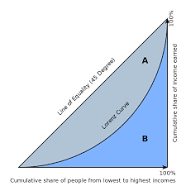 

`Management.professional.and.related.occupations` The percentage of the county's workforce working in management professions.

`Service.occupations`The percentage of the county's workforce working in service occupations.


`Sales.and.office.occupations` The percentage of the county's workforce working in service occuptions.


`Farming.fishing.and.forestry.occupations` The percentage of the county's workforce working in Fishing and Forestry occupations. 
#### Dependent variables:
The question states to predict the `2008 vote share` in each county. This is the number of republican votes divided by the total votes in each county. The variable in its current form is continuous. 

It is important to differentiate this variable from the input to the logit model below, where, we convert the target feature to a 0 or 1. (This is to better suit the sigmoid function.)  But for the linear model, we keep this variable as-is.

####    b. How good is the fit of your model? What metric is a good measure to evaluate yourmodel here? Interpret your results.

#### Good fit?
A well fitting model results in predicted values (Y-hat) close to the observed data values (Y-i).
This model does indicate a good fit w.r.t. the r-squared of 0.951, adjusted r-squared of 0.950



Based on these results we feel confident in reporting that: Ninety-five percent of the variability in Y can be explained by our model. 


#### Evaluation Metric:
The best measure of model fitness depends on the research objectives. Though, multiple measures are useful.
`R-Squared` is a measure of goodness of fit which compares the `mean model` to our regression model. R-squared values range from zero to one. Zero r-squared would indicate the regression model shows no improvement over the mean model; conversely, 1.0 r-squared would indicate that the model is infinitely better than the mean model. In this case we have an r-squared of 0.95 which indicates a very good fit. 

One drawback of evaluating a multiple linear regression on r-squared alone is that; adding predictors can artificially increase the r-squared. We can control for this using the `adjusted R-squared` which accounts for the model's degrees of freedom. If we see an adjusted r-squared that is vastly different, then we may conclude that there are too many predictors and our model doesn't really fit as well as expected. However in our case the adjusted r-squared is off by 0.001, so we can conclude our model is free of this complication.

#### Interpret results:
`The vote share distribution is leptokurtic (positive kurtosis).` A perfectly normal distribution has a kurtosis of 3. By the summary table we are given the kurtosis of 3.6 indicating a peaked-curve, and more higher values. 

Further, the Jarque-Bera statistic (140.79) is very large. This test statistic measures the difference of the skewness and kurtosis of the series with those from the normal distribution.

The probability for type-1 error (2.67e-31) for the Jarque-Bera statistic is small. Thus, we can reject the null hypothesis that the Jarque-Bera statistics exceeds (in absolute value) the observed value.

The distribution has a negative skewness, indicating a long left tail, more lower values.

We conclude that all X `beta values are significant `given small p-values. Small p-value would indicate good predictions.


### 2. Fit a logistic regression model using the same demographic data to `predict which political party will take the majority of a county’s votes`. (Please `use statsmodels` package to create your logistic regression model here, not scikit-learn.) When building your model, answer the following questions:

In [7]:
#converts y to binary
y = np.where(y>=0.5,1,0)

# Logistic Regression Using `statsmodels`
x = sm.add_constant(x)
model = sm.Logit(y, x)

result = model.fit()

yhat = np.where(result.predict(x)>=0.5,1,0)

result.summary()
#l1 l2

Optimization terminated successfully.
         Current function value: 0.501661
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3141
Model:                          Logit   Df Residuals:                     3133
Method:                           MLE   Df Model:                            7
Date:                Mon, 19 Aug 2019   Pseudo R-squ.:                  0.1520
Time:                        13:32:49   Log-Likelihood:                -1575.7
converged:                       True   LL-Null:                       -1858.2
Covariance Type:            nonrobust   LLR p-value:                8.343e-118
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                7.0965      0.803      8.838      0.000       5.523       8.670
Graduate Degree                                     -0.2107      0.021    -10.057      0.000      -0.252      -0.170
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4    -0.0215      0.003     -6.374      0.000      -0.028      -0.015
Gini.Coefficient                                    -2.3594      1.297     -1.819      0.069      -4.901       0.183
Management.professional.and.related.occupations      0.0182      0.012      1.511      0.131      -0.005       0.042
Service.occupations                                 -0.1447      0.014    -10.256      0.000      -0.172      -0.117
Sales.and.office.occupations                        -0.0321      0.016     -2.011      0.044      -0.063      -0.001
Farming.fishing.and.forestry.occupations             0.0196      0.024      0.819      0.413      -0.027       0.067
====================================================================================================================
"""

In [8]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y, yhat)
print('Confusion Matrix')
print(cm1)

#compute accuracy score
total = sum(sum(cm1))
TN = cm1[0,0]
TP = cm1[1,1]
accuracy = (TN+TP)/total
print('-'*80)
print('Accuracy score',accuracy)

#compute sensitivity
FN = cm1[1,0]
sensitivity = TP/(TP+FN)
print('-'*80)
print('Sensitivity ',sensitivity)

#compute precision
FP = cm1[0,1]
precision = TP/(TP+FP)
print('-'*80)
print('Precision ',precision)

#compute specificity
specificity = TN/(TN+FP)
print('-'*80)
print('Specificity ',specificity)

# Root Mean Squared Error
print('-'*80)
print('Root Mean Squared Error',rmse(yhat,y))

Confusion Matrix
[[ 277  598]
 [ 121 2145]]
--------------------------------------------------------------------------------
Accuracy score 0.7710920089143585
--------------------------------------------------------------------------------
Sensitivity  0.9466019417475728
--------------------------------------------------------------------------------
Precision  0.7819905213270142
--------------------------------------------------------------------------------
Specificity  0.31657142857142856
--------------------------------------------------------------------------------
Root Mean Squared Error 0.5785223447487892


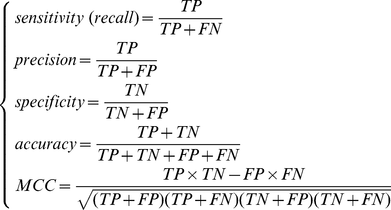

#### a.How good is the fit of your model? What metric is a good measure to evaluate yourmodel here? Interpret your results.

#### Good fit? 
This is an entirely different problem than the one above for linear regression. Instead of a regression problem, we have a classification problem. For this reason, we must define new evaluation metrics. 

It is not a great fit considering the `specificity` is very low. (0.316)

Though the `sensitivity` is very good. (0.946)

Overall, the `accuracy` score is not very good. (0.771) but not horrible. It's better than random guessing.

And our root mean squared error is very high. Which means we have a lot of error. (0.58)

Thus, we can conclude that this is not a good fit.

#### Evaluation metric:

`sensitivity` also called the true positive rate; measures the proportion of actual positives that are correctly identified as such.

`specificity` also called the true negative rate; measures the proportion of actual negative that are correctly identified as such. 

`Accuracy` measures the proportion of correct predictions to the total number of predictions.

`Root Mean Squared Error` measures the difference between the values predicted by the model and the true values, squares them, then averages them, then square-roots them.

(pseudo r-squared here is not all that useful.)

#### Interpret:

Although we made a good start, predicting this new problem. We are not satisfied by these results, as evidenced by our low evaluation metrics. Perhaps logistic regression worked better in theory than in practice. We will explore other (better) methods which might fit this dataset a little bit better.

## 3.Now build new models to predict the 2012 and 2016 relative vote share of the Republican party,respectively. How does each of their performances compare to your 2008 model from question 4.1?

In [9]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

import lightgbm as lgb
import xgboost as xgb

# xgb

In [10]:
def run_xgb(train_X, train_y, val_X, val_y, test_X):
    params = {'objective': 'reg:linear', 
          'eval_metric': 'rmse',
          'eta': 0.001,
          'max_depth': 10, 
          'subsample': 0.6, 
          'colsample_bytree': 0.6,
          'alpha':0.001,
          'random_state': 69, 
          'silent': True}
    
    tr_data = xgb.DMatrix(train_X, train_y)
    va_data = xgb.DMatrix(val_X, val_y)
    xgb.Booster(params=none)
    watchlist = [(tr_data, 'train'), (va_data, 'valid')]
    
    model_xgb = xgb.train(params, tr_data, 2000, watchlist, maximize=False, early_stopping_rounds = 100, verbose_eval=100)
    
    dtest = xgb.DMatrix(test_X)
    xgb_pred_y = np.expm1(model_xgb.predict(dtest, ntree_limit=model_xgb.best_ntree_limit))
    
    return xgb_pred_y, model_xgb

# lgb

In [11]:
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 40,
        "learning_rate" : 0.004,
        "bagging_fraction" : 0.6,
        "feature_fraction" : 0.6,
        "bagging_frequency" : 6,
        "bagging_seed" : 69,
        "verbosity" : -1,
        "seed": 69
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 5000, 
                      valid_sets=[lgtrain, lgval], 
                      early_stopping_rounds=100, 
                      verbose_eval=150, 
                      evals_result=evals_result)
    
    pred_test_y = np.expm1(model.predict(test_X, num_iteration=model.best_iteration))
    return pred_test_y, model, evals_result

# 2012 Election

In [12]:
y12 = df.Rep_Vote_share_12
dev_X, val_X, dev_y, val_y = train_test_split(x, y12, test_size = 0.13, random_state = 69)

In [13]:
# train xgb
pred_test_xgb, model_xgb = run_xgb(dev_X, dev_y, val_X, val_y, x)
print("Done")

[0]	train-rmse:0.183993	valid-rmse:0.186597
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[100]	train-rmse:0.173944	valid-rmse:0.177912
[200]	train-rmse:0.164928	valid-rmse:0.170252
[300]	train-rmse:0.156796	valid-rmse:0.163555
[400]	train-rmse:0.149374	valid-rmse:0.157576
[500]	train-rmse:0.142693	valid-rmse:0.152329
[600]	train-rmse:0.136626	valid-rmse:0.147744
[700]	train-rmse:0.131041	valid-rmse:0.14373
[800]	train-rmse:0.12597	valid-rmse:0.14018
[900]	train-rmse:0.121319	valid-rmse:0.137106
[1000]	train-rmse:0.117109	valid-rmse:0.134384
[1100]	train-rmse:0.113218	valid-rmse:0.132074
[1200]	train-rmse:0.109614	valid-rmse:0.129994
[1300]	train-rmse:0.106289	valid-rmse:0.128133
[1400]	train-rmse:0.103172	valid-rmse:0.12649
[1500]	train-rmse:0.10036	valid-rmse:0.1251
[1600]	train-rmse:0.097684	valid-rmse:0.123872
[1700]	train-rmse:0.095169	valid-rmse:0.122814
[1800]	train-rmse:0.092902	

In [14]:
# lgb train
pred_test, model, evals_result = run_lgb(dev_X, dev_y, val_X, val_y, x)
print("Done")

Training until validation scores don't improve for 100 rounds.
[150]	training's rmse: 0.130048	valid_1's rmse: 0.127756
[300]	training's rmse: 0.118202	valid_1's rmse: 0.119917
[450]	training's rmse: 0.110518	valid_1's rmse: 0.116557
[600]	training's rmse: 0.104944	valid_1's rmse: 0.114881
[750]	training's rmse: 0.100515	valid_1's rmse: 0.114263
[900]	training's rmse: 0.0967957	valid_1's rmse: 0.113691
[1050]	training's rmse: 0.093521	valid_1's rmse: 0.113588
Early stopping, best iteration is:
[1084]	training's rmse: 0.0928304	valid_1's rmse: 0.113547
Done


# 2016 Election

In [15]:
y16 = df.Rep_Vote_share_16
dev_X, val_X, dev_y, val_y = train_test_split(x, y16, test_size = 0.13, random_state = 69)

In [16]:
# train xgb
pred_test_xgb, model_xgb = run_xgb(dev_X, dev_y, val_X, val_y, x)
print("Done")

[0]	train-rmse:0.231112	valid-rmse:0.23412
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[100]	train-rmse:0.215142	valid-rmse:0.219118
[200]	train-rmse:0.200745	valid-rmse:0.205784
[300]	train-rmse:0.187786	valid-rmse:0.19391
[400]	train-rmse:0.175972	valid-rmse:0.183149
[500]	train-rmse:0.165344	valid-rmse:0.173761
[600]	train-rmse:0.155789	valid-rmse:0.165509
[700]	train-rmse:0.147142	valid-rmse:0.158212
[800]	train-rmse:0.139348	valid-rmse:0.151815
[900]	train-rmse:0.132248	valid-rmse:0.146137
[1000]	train-rmse:0.125883	valid-rmse:0.141192
[1100]	train-rmse:0.120087	valid-rmse:0.136915
[1200]	train-rmse:0.114806	valid-rmse:0.133146
[1300]	train-rmse:0.110023	valid-rmse:0.129802
[1400]	train-rmse:0.10564	valid-rmse:0.126901
[1500]	train-rmse:0.101693	valid-rmse:0.124385
[1600]	train-rmse:0.098047	valid-rmse:0.122237
[1700]	train-rmse:0.094742	valid-rmse:0.120362
[1800]	train-rmse:0.091

In [17]:
# lgb train
pred_test, model, evals_result = run_lgb(dev_X, dev_y, val_X, val_y, x)
print("Done")

Training until validation scores don't improve for 100 rounds.
[150]	training's rmse: 0.132044	valid_1's rmse: 0.127994
[300]	training's rmse: 0.116229	valid_1's rmse: 0.115518
[450]	training's rmse: 0.106981	valid_1's rmse: 0.110448
[600]	training's rmse: 0.100689	valid_1's rmse: 0.108255
[750]	training's rmse: 0.0959263	valid_1's rmse: 0.107497
[900]	training's rmse: 0.0921031	valid_1's rmse: 0.107298
Early stopping, best iteration is:
[943]	training's rmse: 0.0910882	valid_1's rmse: 0.107221
Done


## xgb

#### Better performance?


In [18]:
# Performance improvement

It's worth repeating that this is an entirely different problem than the one above for linear regression. Instead of a regression problem, we have a classification problem. Therefore, when we compare metrics, keep in mind that these metrics are calculated based on transformations of different data. (this is an inconsistant comparison) 

That being said: gradient boosted decision trees in general perform far superior to linear/logit models, with vastly smaller RMSE's. 

Our RMSE went down to 0.10 (from 0.57)

Our new models fit the data much better than the linear regression. This seems to be consistent across both models: lgb and xgb.

Interestingly, xgb seems to overfit the training set a little more than lgb. (As seen by the lower train-rmse.)

#### Good fit?
It's a pretty good fit. Smaller error values, indicate our predictions are not very far from the true values. If are prediction errors are low, that tells me we have a good fit. 

#### Evaluation Metric:
RMSE: I decided to use this metric because it is a commonly used metric in kaggle competitions. It's also very easy to calculate with a basic function.  

#### Interpret:
We can confidently ignore the problem of over-fitting in this new boosted-tree model, because we actually used train-test-split. Overfitting is a problem we didn't test for in the linear model. 

Consequently, a multiple linear regression model that becomes tailor-made to fit the random noise of one sample is unlikely to fit the randomness of another sample. Thus, overfitting a regression model reduces its generalizability outside the original dataset. If we wanted a more robust linear model with a good generalizability, we could go back and use train_test_split to make sure we're not overfitting.

`The main skills being assessed` in this deliverable is the `ability to fit a linear model` to a dataset and `interpret the quality of the model’s fit`. We aren’t expecting any train_test_split here, and given the timeconstraints, we aren’t expecting any variable transformations to ensure linear relationships betweenindependent and dependent variables. We’re looking to see whether you understand how to `evaluate a model’s fit`, `assess the relevance/significance of whatever ​independent​ features you’ve used` to predict the dependent​ variable, `and compare the fit quality of different models.` 